In [4]:
using Controlz, DifferentialEquations

PyPlot.matplotlib.font_manager.fontManager.addfont("OpenSans-Regular.ttf")
# PyPlot.matplotlib.font_manager.fontManager.addfont("Abel-Regular.ttf")
PyPlot.matplotlib.style.use("grandbudapest.mplstyle")

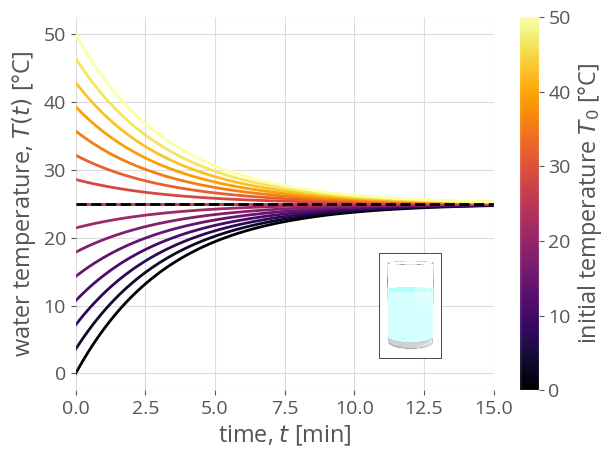

In [36]:
T_a = 25.0

f(T, p, t) = 0.3 * (T_a - T)
tspan = (0.0, 15.0)

fig, ax = subplots()
cmap = get_cmap("inferno")
t = range(0.0, tspan[2], length=100)
T = zeros(length(t), 15)
for T0 in range(0.0, 50.0, length=15)

    prob = ODEProblem(f, T0, tspan)
    sol = solve(prob)
    
    plot(t, sol.(t), color=cmap(T0/50))
end
xlabel(L"time, $t$ [min]")
ylabel(L"water temperature, $T(t)$ [°C]")
axhline(y=T_a, color="k", linestyle="--")
xlim([0, tspan[2]])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=50))
colorbar(sm, label=L"initial temperature $T_0$ [°C]")

#Add png to plot
mof_fig = imread("water.png")
imagebox = PyPlot.matplotlib.offsetbox.OffsetImage(mof_fig, zoom=0.05, filternorm=100.0)
ab = PyPlot.matplotlib.offsetbox.AnnotationBbox(imagebox, (12.0, 10.0))
ax.add_artist(ab)

tight_layout()

savefig("water_inverse_problem.pdf", format="pdf")